In [186]:
import sys
sys.path.append("/Users/luigibungaro/dsr/ThinkDSP/code")
import sys
sys.path.append("/Users/marchan/Documents/GitHub/PORTFOLIO_PROJECT/LIBRARIES/ThinkDSP/code")
sys.path.append("/Users/marchan/Documents/GitHub/PORTFOLIO_PROJECT/LIBRARIES/")
sys.path.append("Users/luigibungaro/dsr/Audio_Probreat/")

In [93]:
import thinkdsp
import thinkplot
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pyAudioAnalysis import audioFeatureExtraction as aFE, audioBasicIO, \
audioAnalysis,audioSegmentation,audioVisualization,audioTrainTest
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import keras
from keras import models,layers
import os
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout, GRU
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from keras import optimizers
from keras import losses

In [3]:
#amplitude_data()
X_normal = thinkdsp.read_wave('peterbertley_Audio/Atraining_normal/201101070538.wav')
X_murmur = thinkdsp.read_wave('peterbertley_Audio/Atraining_murmur/201101051104.wav')
X_extrahls = thinkdsp.read_wave('peterbertley_Audio/Atraining_extrahls/201101070953.wav')

391787 8.8840589569161
44100.0


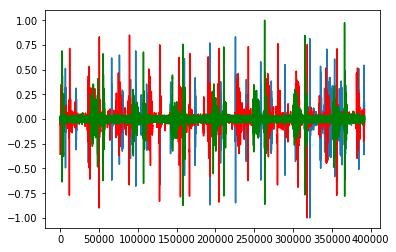

In [109]:
print(len(X_normal),X_normal.duration)
print(len(X_normal)/(X_normal.duration))
plt.plot(X_normal.ys)
plt.plot(X_murmur.ys,'r')
plt.plot(X_extrahls.ys,'g')

In [183]:
# Spectrum
spectrum_no = X_normal.make_spectrum()
spectrum_mu = X_murmur.make_spectrum()
spectrum_ex = X_extrahls.make_spectrum()
#spectrum.low_pass(cutoff=160, factor=0.01)
#spectrum.plot(high=400)
#print(len(spectrum.amps ),spectrum.amps.shape)
#print(len(spectrum.amps),len(spectrum.fs),len(spectrum.angles),X_normal.framerate)

In [185]:
spectrum

NameError: name 'spectrum' is not defined

In [65]:
spectrum.amps 

NameError: name 'spectrum' is not defined

In [ ]:
spectrum.fs

In [ ]:
spectrum.hs

In [ ]:
spectrum.angles

In [ ]:
from scipy import stats

In [ ]:
stats.describe(spectrum.hs)

In [ ]:
stats.describe(spectrum.angles)

In [ ]:
stats.describe(spectrum.amps)

In [ ]:
stats.describe(spectrum.fs)

In [180]:
def plot_all():
    freq =100
    plt.plot(X_normal.ys)
    plt.plot(X_murmur.ys,'r')
    plt.plot(X_extrahls.ys,'g')
    plt.title('amplitude')
    plt.show()
    plt.plot(spectrum_no.amps[spectrum_no.fs <freq])
    plt.plot(spectrum_mu.amps[spectrum_mu.fs <freq],'r')
    plt.plot(spectrum_ex.amps[spectrum_ex.fs <freq],'g')
    plt.title('spectrum.amps')
    plt.show()
    plt.plot(spectrum_no.hs.real[spectrum_no.fs <freq])
    plt.plot(spectrum_mu.hs.real[spectrum_mu.fs <freq],'r')
    plt.plot(spectrum_ex.hs.real[spectrum_ex.fs <freq],'g')
    plt.title('spctrum.hs')
    plt.show()
    plt.plot(spectrum_no.hs.imag[spectrum_no.fs <freq])
    plt.plot(spectrum_mu.hs.imag[spectrum_mu.fs <freq],'r')
    plt.plot(spectrum_ex.hs.imag[spectrum_ex.fs <freq],'g')
    plt.title('spctrum.img')
    plt.show()
    print(len(spectrum_no.amps[spectrum_no.fs <freq]))

In [181]:
X_normal = thinkdsp.read_wave('peterbertley_Audio/Atraining_normal/201102081321.wav')
X_murmur = thinkdsp.read_wave('peterbertley_Audio/Atraining_murmur/201101180902.wav')
X_extrahls = thinkdsp.read_wave('peterbertley_Audio/Atraining_extrahls/201101160804.wav')
spectrum_no = X_normal.make_spectrum()
spectrum_mu = X_murmur.make_spectrum()
spectrum_ex = X_extrahls.make_spectrum()

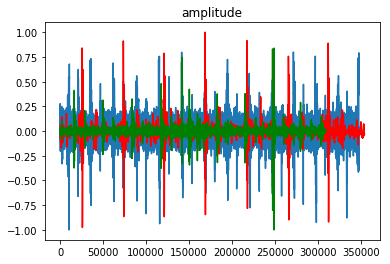

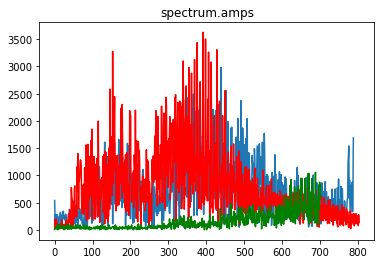

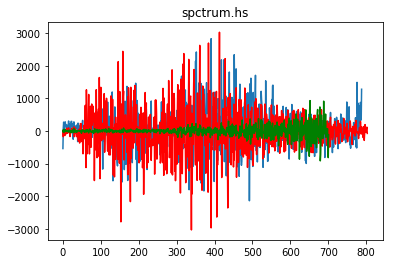

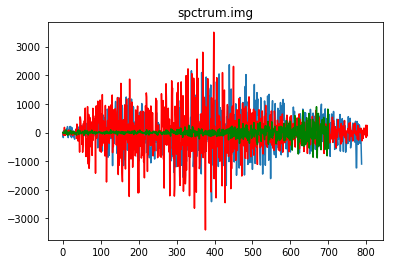

789


In [182]:
plot_all()

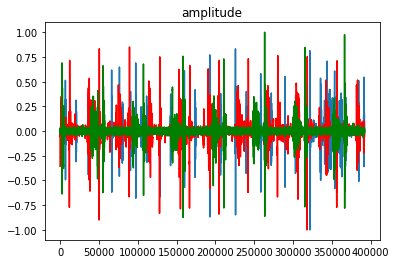

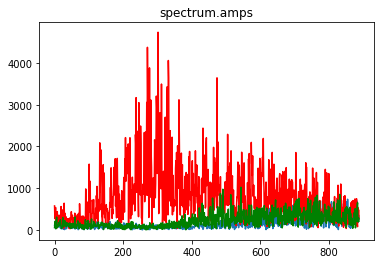

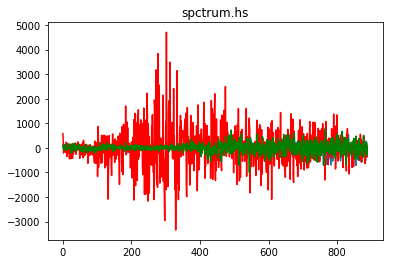

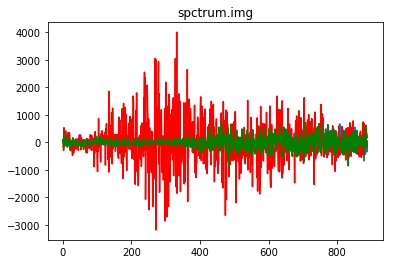

889


In [175]:
plot_all()

In [ ]:
spectrum_mu.hs[0].imag

In [160]:
len(spectrum_no.amps[spectrum.fs<200])

1777

In [157]:
def dsp_dft_fs(low_pass_filter=200):
    target=[]
    i=0
    data=[]
    samples_filtering=1400

    for item in os.listdir('peterbertley_Audio/Atraining_murmur'):  #Atraining_normal   
        #Atraining_extrahls
             if item.endswith(".wav"):
                    X = thinkdsp.read_wave('peterbertley_Audio/Atraining_murmur/'+str(item))
                    X = X.make_spectrum()
                    if len(X.amps[X.fs<low_pass_filter])>samples_filtering:
                        data.append(X.amps[X.fs<low_pass_filter][:samples_filtering])
                        target.append('0')
                    else:
                        pass
            

    for item in os.listdir('peterbertley_Audio/Atraining_normal'):    #Atraining_extrahls
         if item.endswith(".wav"):
                X = thinkdsp.read_wave('peterbertley_Audio/Atraining_normal/'+str(item))
                X = X.make_spectrum()
                if len(X.amps[X.fs<low_pass_filter])>samples_filtering:
                    data.append(X.amps[X.fs<low_pass_filter][:samples_filtering])
                    target.append('1')
                else:
                    pass

    for item in os.listdir('peterbertley_Audio/Atraining_extrahls'):   
         if item.endswith(".wav"):
                X = thinkdsp.read_wave('peterbertley_Audio/Atraining_extrahls/'+str(item))
                X = X.make_spectrum()
                if len(X.amps[X.fs<low_pass_filter])>samples_filtering:
                    data.append(X.amps[X.fs<low_pass_filter][:samples_filtering])
                    target.append('1')   #CHANGE
                else:
                    pass  
    
    target = np.array(target)

    X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.4)
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    return X_train,X_test,y_train,y_test

In [158]:
X_train,X_test,y_train,y_test = dsp_dft_fs(low_pass_filter=400)

In [88]:
#X_train = X_train.reshape((39,1400,1))
#X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

In [129]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [130]:
print(X_train.shape,y_train.shape)

(43, 600) (43,)


In [131]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

# LSTM Model

In [148]:
# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(300,input_shape=(X_train.shape[1],X_train.shape[2]),return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(200,input_shape=(X_train.shape[1],X_train.shape[2]),return_sequences=True))
model.add(LSTM(100,input_shape=(X_train.shape[1],X_train.shape[2]),return_sequences=True))
model.add(LSTM(30,input_shape=(X_train.shape[1],X_train.shape[2]),return_sequences=True))
model.add(LSTM(10,activation='relu',return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='softmax'))

sgd = optimizers.rmsprop(lr=0.0001)
model.compile(loss=losses.binary_crossentropy,
              optimizer=sgd,
              metrics=['accuracy'])

In [149]:
model.fit(X_train, y_train,epochs=100,batch_size=132)

Epoch 1/100
43/43 [==============================] - 10s 223ms/step - loss: 6.6736 - acc: 0.5814
Epoch 2/100
43/43 [==============================] - 6s 148ms/step - loss: 6.6736 - acc: 0.5814
Epoch 3/100
43/43 [==============================] - 7s 166ms/step - loss: 6.6736 - acc: 0.5814
Epoch 4/100
43/43 [==============================] - 7s 174ms/step - loss: 6.6736 - acc: 0.5814
Epoch 5/100


KeyboardInterrupt: 

In [ ]:
pred = model.predict(X_test)
model.evaluate(X_test,y_test)
model.score(pred,y_test)

In [150]:
# ANN

In [ ]:
# Grid Search

In [141]:
model = models.Sequential()
model.add(layers.Dense(2000, activation='relu',input_shape=((X_train.shape[1]),)))
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(1,activation='softmax'))
model.summary()


sgd = optimizers.RMSprop(lr=0.0001)

model.compile(optimizer=sgd,
              loss=losses.binary_crossentropy,
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 2000)              1202000   
_________________________________________________________________
dense_39 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_40 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_41 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 201       
Total params: 3,803,901
Trainable params: 3,803,901
Non-trainable params: 0
_________________________________________________________________


In [142]:
history = model.fit(X_train.reshape(X_train.shape[0],
                                    X_train.shape[1]),y_train,epochs=100,batch_size=32)

Epoch 1/100
43/43 [==============================] - 1s 30ms/step - loss: 6.6736 - acc: 0.5814
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 6.6736 - acc: 0.5814
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: 6.6736 - acc: 0.5814
Epoch 4/100
43/43 [==============================] - 0s 4ms/step - loss: 6.6736 - acc: 0.5814
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 6.6736 - acc: 0.5814
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 6.6736 - acc: 0.5814
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 6.6736 - acc: 0.5814
Epoch 8/100
43/43 [==============================] - 0s 3ms/step - loss: 6.6736 - acc: 0.5814
Epoch 9/100
43/43 [==============================] - 0s 3ms/step - loss: 6.6736 - acc: 0.5814
Epoch 10/100
43/43 [==============================] - 0s 3ms/step - loss: 6.6736 - acc: 0.5814
Epoch 11/100
43/43 [==============================] - 0s 3

In [147]:
model.evaluate(X_test,y_test)

AttributeError: 'RandomForestClassifier' object has no attribute 'evaluate'

In [ ]:
# Random Forest

In [144]:
model = RandomForestClassifier(n_estimators=1000,criterion='entropy',
                               max_depth=50,max_features=100, )
model.fit(X_train.reshape(X_train.shape[0],X_train.shape[1]),y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=50, max_features=100, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [145]:
pred = model.predict(X_test.reshape(X_test.shape[0],X_test.shape[1]))

In [146]:
model.score(X_test.reshape(X_test.shape[0],X_test.shape[1]),y_test)

0.7241379310344828

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy_score(y_test,pred)

In [54]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

/Users/luigibungaro/dsr/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/luigibungaro/dsr/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [60]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 

In [61]:
optimized_GBM.fit(X_train, y_train[:,0])

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/anaconda3/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/anaconda3/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x109e9ce40, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/luigibungaro/dsr/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/luigibungaro/dsr/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/luigi.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x109e9ce40, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/luigibungaro/dsr/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/luigibungaro/dsr/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/luigi.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    492         if self.poller is not None:
    493             self.poller.start()
    494         self.kernel.start()
    495         self.io_loop = ioloop.IOLoop.current()
    496         try:
--> 497             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    498         except KeyboardInterrupt:
    499             pass
    500 
    501 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/tornado/platform/asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    127         except (RuntimeError, AssertionError):
    128             old_loop = None
    129         try:
    130             self._setup_logging()
    131             asyncio.set_event_loop(self.asyncio_loop)
--> 132             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Uni...EventLoop running=True closed=False debug=False>>
    133         finally:
    134             asyncio.set_event_loop(old_loop)
    135 
    136     def stop(self):

...........................................................................
/anaconda3/lib/python3.6/asyncio/base_events.py in run_forever(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_UnixS...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
/anaconda3/lib/python3.6/asyncio/base_events.py in _run_once(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(15, 1)>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
/anaconda3/lib/python3.6/asyncio/events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(15, 1)>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (15, 1)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/tornado/platform/asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=15, events=1)
    117             self.writers.remove(fd)
    118         del self.handlers[fd]
    119 
    120     def _handle_events(self, fd, events):
    121         fileobj, handler_func = self.handlers[fd]
--> 122         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    123 
    124     def start(self):
    125         try:
    126             old_loop = asyncio.get_event_loop()

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'optimized_GBM.fit(X_train, y_train[:,0])', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 10, 24, 18, 46, 20, 374878, tzinfo=tzutc()), 'msg_id': '6b81d3bfad64460797a1df4de5cf635b', 'msg_type': 'execute_request', 'session': '60bedfc1a3cf4c908c70fa6a26afec2d', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '6b81d3bfad64460797a1df4de5cf635b', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warning("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'60bedfc1a3cf4c908c70fa6a26afec2d']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'optimized_GBM.fit(X_train, y_train[:,0])', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 10, 24, 18, 46, 20, 374878, tzinfo=tzutc()), 'msg_id': '6b81d3bfad64460797a1df4de5cf635b', 'msg_type': 'execute_request', 'session': '60bedfc1a3cf4c908c70fa6a26afec2d', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '6b81d3bfad64460797a1df4de5cf635b', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'60bedfc1a3cf4c908c70fa6a26afec2d'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'optimized_GBM.fit(X_train, y_train[:,0])', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 10, 24, 18, 46, 20, 374878, tzinfo=tzutc()), 'msg_id': '6b81d3bfad64460797a1df4de5cf635b', 'msg_type': 'execute_request', 'session': '60bedfc1a3cf4c908c70fa6a26afec2d', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '6b81d3bfad64460797a1df4de5cf635b', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='optimized_GBM.fit(X_train, y_train[:,0])', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'optimized_GBM.fit(X_train, y_train[:,0])'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('optimized_GBM.fit(X_train, y_train[:,0])',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('optimized_GBM.fit(X_train, y_train[:,0])',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='optimized_GBM.fit(X_train, y_train[:,0])', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'optimized_GBM.fit(X_train, y_train[:,0])'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/IPython/core/interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='optimized_GBM.fit(X_train, y_train[:,0])', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-61-6da0294dce06>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 12320d588, execution_...rue silent=False shell_futures=True> result=None>)
   2902                     return True
   2903 
   2904             for i, node in enumerate(to_run_interactive):
   2905                 mod = ast.Interactive([node])
   2906                 code = compiler(mod, cell_name, "single")
-> 2907                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x13be27c90, file "<ipython-input-61-6da0294dce06>", line 1>
        result = <ExecutionResult object at 12320d588, execution_...rue silent=False shell_futures=True> result=None>
   2908                     return True
   2909 
   2910             # Flush softspace
   2911             if softspace(sys.stdout, 0):

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x13be27c90, file "<ipython-input-61-6da0294dce06>", line 1>, result=<ExecutionResult object at 12320d588, execution_...rue silent=False shell_futures=True> result=None>)
   2956         outflag = True  # happens in more places, so it's easier as default
   2957         try:
   2958             try:
   2959                 self.hooks.pre_run_code_hook()
   2960                 #rprint('Running code', repr(code_obj)) # dbg
-> 2961                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x13be27c90, file "<ipython-input-61-6da0294dce06>", line 1>
        self.user_global_ns = {'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'Dense': <class 'keras.layers.core.Dense'>, 'Dropout': <class 'keras.layers.core.Dropout'>, 'ExtraTreesClassifier': <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>, 'Flatten': <class 'keras.layers.core.Flatten'>, 'GRU': <class 'keras.layers.recurrent.GRU'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', 'import sys\nsys.path.append("/Users/luigibungaro/dsr/ThinkDSP/code")', 'import thinkdsp\nimport thinkplot\nimport os\nimpor... keras import optimizers\nfrom keras import losses', "#amplitude_data()\nX_normal = thinkdsp.read_wave(...rtley_Audio/Atraining_extrahls/201101070953.wav')", 'def dsp_dft_fs(low_pass_filter=200):\n    target=...e[1],1))\n    return X_train,X_test,y_train,y_test', 'X_train,X_test,y_train,y_test = dsp_dft_fs()', 'model = RandomForestClassifier(n_estimators=1000...shape(X_train.shape[0],X_train.shape[1]),y_train)', 'pred = model.predict(X_test.reshape(X_test.shape[0],X_test.shape[1]))', 'model.score(X_test.reshape(X_test.shape[0],X_test.shape[1]),y_test)', 'from sklearn.metrics import accuracy_score', 'accuracy_score(y_test,pred)', 'model = RandomForestClassifier(n_estimators=1000...shape(X_train.shape[0],X_train.shape[1]),y_train)', 'pred = model.predict(X_test.reshape(X_test.shape[0],X_test.shape[1]))', 'model.score(X_test.reshape(X_test.shape[0],X_test.shape[1]),y_test)', 'from sklearn.metrics import accuracy_score', 'accuracy_score(y_test,pred)', 'confusion_matrix(y_test,pred)', 'model = RandomForestClassifier(n_estimators=1000...shape(X_train.shape[0],X_train.shape[1]),y_train)', 'pred = model.predict(X_test.reshape(X_test.shape[0],X_test.shape[1]))', 'model.score(X_test.reshape(X_test.shape[0],X_test.shape[1]),y_test)', ...], ...}
        self.user_ns = {'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'Dense': <class 'keras.layers.core.Dense'>, 'Dropout': <class 'keras.layers.core.Dropout'>, 'ExtraTreesClassifier': <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>, 'Flatten': <class 'keras.layers.core.Flatten'>, 'GRU': <class 'keras.layers.recurrent.GRU'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', 'import sys\nsys.path.append("/Users/luigibungaro/dsr/ThinkDSP/code")', 'import thinkdsp\nimport thinkplot\nimport os\nimpor... keras import optimizers\nfrom keras import losses', "#amplitude_data()\nX_normal = thinkdsp.read_wave(...rtley_Audio/Atraining_extrahls/201101070953.wav')", 'def dsp_dft_fs(low_pass_filter=200):\n    target=...e[1],1))\n    return X_train,X_test,y_train,y_test', 'X_train,X_test,y_train,y_test = dsp_dft_fs()', 'model = RandomForestClassifier(n_estimators=1000...shape(X_train.shape[0],X_train.shape[1]),y_train)', 'pred = model.predict(X_test.reshape(X_test.shape[0],X_test.shape[1]))', 'model.score(X_test.reshape(X_test.shape[0],X_test.shape[1]),y_test)', 'from sklearn.metrics import accuracy_score', 'accuracy_score(y_test,pred)', 'model = RandomForestClassifier(n_estimators=1000...shape(X_train.shape[0],X_train.shape[1]),y_train)', 'pred = model.predict(X_test.reshape(X_test.shape[0],X_test.shape[1]))', 'model.score(X_test.reshape(X_test.shape[0],X_test.shape[1]),y_test)', 'from sklearn.metrics import accuracy_score', 'accuracy_score(y_test,pred)', 'confusion_matrix(y_test,pred)', 'model = RandomForestClassifier(n_estimators=1000...shape(X_train.shape[0],X_train.shape[1]),y_train)', 'pred = model.predict(X_test.reshape(X_test.shape[0],X_test.shape[1]))', 'model.score(X_test.reshape(X_test.shape[0],X_test.shape[1]),y_test)', ...], ...}
   2962             finally:
   2963                 # Reset our crash handler in place
   2964                 sys.excepthook = old_excepthook
   2965         except SystemExit as e:

...........................................................................
/Users/luigibungaro/dsr/Audio_Probreat/<ipython-input-61-6da0294dce06> in <module>()
----> 1 optimized_GBM.fit(X_train, y_train[:,0])

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/sklearn/grid_search.py in fit(self=GridSearchCV(cv=5, error_score='raise',
       e...jobs', refit=True, scoring='accuracy', verbose=0), X=array([[[577.30419348],
        [273.07662708],
...        [ 34.14008764],
        [ 54.1396931 ]]]), y=array([1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0...., 1.,
       0., 0., 0., 0., 1.], dtype=float32))
    833         y : array-like, shape = [n_samples] or [n_samples, n_output], optional
    834             Target relative to X for classification or regression;
    835             None for unsupervised learning.
    836 
    837         """
--> 838         return self._fit(X, y, ParameterGrid(self.param_grid))
        self._fit = <bound method BaseSearchCV._fit of GridSearchCV(...obs', refit=True, scoring='accuracy', verbose=0)>
        X = array([[[577.30419348],
        [273.07662708],
...        [ 34.14008764],
        [ 54.1396931 ]]])
        y = array([1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0...., 1.,
       0., 0., 0., 0., 1.], dtype=float32)
        self.param_grid = {'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]}
    839 
    840 
    841 class RandomizedSearchCV(BaseSearchCV):
    842     """Randomized search on hyper parameters.

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/sklearn/grid_search.py in _fit(self=GridSearchCV(cv=5, error_score='raise',
       e...jobs', refit=True, scoring='accuracy', verbose=0), X=array([[[577.30419348],
        [273.07662708],
...        [ 34.14008764],
        [ 54.1396931 ]]]), y=array([1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0...., 1.,
       0., 0., 0., 0., 1.], dtype=float32), parameter_iterable=<sklearn.grid_search.ParameterGrid object>)
    569         )(
    570             delayed(_fit_and_score)(clone(base_estimator), X, y, self.scorer_,
    571                                     train, test, self.verbose, parameters,
    572                                     self.fit_params, return_parameters=True,
    573                                     error_score=self.error_score)
--> 574                 for parameters in parameter_iterable
        parameters = undefined
        parameter_iterable = <sklearn.grid_search.ParameterGrid object>
    575                 for train, test in cv)
    576 
    577         # Out is a list of triplet: score, estimator, n_test_samples
    578         n_fits = len(out)

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV._fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Wed Oct 24 20:46:20 2018
PID: 12485                 Python 3.6.5: /Users/luigibungaro/dsr/bin/python
...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (XGBClassifier(base_score=0.5, booster='gbtree', ...ght=1, seed=0, silent=True,
       subsample=0.8), array([[[577.30419348],
        [273.07662708],
...        [ 34.14008764],
        [ 54.1396931 ]]]), array([1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0...., 1.,
       0., 0., 0., 0., 1.], dtype=float32), make_scorer(accuracy_score), array([ 5,  8, 10, 11, 12, 13, 14, 15, 16, 17, 1... 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]), array([0, 1, 2, 3, 4, 6, 7, 9]), 0, {'max_depth': 3, 'min_child_weight': 1}, {}), {'error_score': 'raise', 'return_parameters': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (XGBClassifier(base_score=0.5, booster='gbtree', ...ght=1, seed=0, silent=True,
       subsample=0.8), array([[[577.30419348],
        [273.07662708],
...        [ 34.14008764],
        [ 54.1396931 ]]]), array([1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0...., 1.,
       0., 0., 0., 0., 1.], dtype=float32), make_scorer(accuracy_score), array([ 5,  8, 10, 11, 12, 13, 14, 15, 16, 17, 1... 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]), array([0, 1, 2, 3, 4, 6, 7, 9]), 0, {'max_depth': 3, 'min_child_weight': 1}, {})
        kwargs = {'error_score': 'raise', 'return_parameters': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/sklearn/cross_validation.py in _fit_and_score(estimator=XGBClassifier(base_score=0.5, booster='gbtree', ...ght=1, seed=0, silent=True,
       subsample=0.8), X=array([[[577.30419348],
        [273.07662708],
...        [ 34.14008764],
        [ 54.1396931 ]]]), y=array([1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0...., 1.,
       0., 0., 0., 0., 1.], dtype=float32), scorer=make_scorer(accuracy_score), train=array([ 5,  8, 10, 11, 12, 13, 14, 15, 16, 17, 1... 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]), test=array([0, 1, 2, 3, 4, 6, 7, 9]), verbose=0, parameters={'max_depth': 3, 'min_child_weight': 1}, fit_params={}, return_train_score=False, return_parameters=True, error_score='raise')
   1670 
   1671     try:
   1672         if y_train is None:
   1673             estimator.fit(X_train, **fit_params)
   1674         else:
-> 1675             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method XGBClassifier.fit of XGBClassifier...ht=1, seed=0, silent=True,
       subsample=0.8)>
        X_train = array([[[ 16.67904135],
        [114.14369938],
...        [ 34.14008764],
        [ 54.1396931 ]]])
        y_train = array([1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1...0., 1., 0., 0., 0., 0., 1.],
      dtype=float32)
        fit_params = {}
   1676 
   1677     except Exception as e:
   1678         if error_score == 'raise':
   1679             raise

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/xgboost/sklearn.py in fit(self=XGBClassifier(base_score=0.5, booster='gbtree', ...ght=1, seed=0, silent=True,
       subsample=0.8), X=array([[[ 16.67904135],
        [114.14369938],
...        [ 34.14008764],
        [ 54.1396931 ]]]), y=array([1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1...0., 1., 0., 0., 0., 0., 1.],
      dtype=float32), sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None, sample_weight_eval_set=None)
    536         if sample_weight is not None:
    537             train_dmatrix = DMatrix(X, label=training_labels, weight=sample_weight,
    538                                     missing=self.missing, nthread=self.n_jobs)
    539         else:
    540             train_dmatrix = DMatrix(X, label=training_labels,
--> 541                                     missing=self.missing, nthread=self.n_jobs)
        self.missing = nan
        self.n_jobs = 1
    542 
    543         self._Booster = train(xgb_options, train_dmatrix, self.n_estimators,
    544                               evals=evals,
    545                               early_stopping_rounds=early_stopping_rounds,

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/xgboost/core.py in __init__(self=<xgboost.core.DMatrix object>, data=array([[[ 16.67904135],
        [114.14369938],
...        [ 34.14008764],
        [ 54.1396931 ]]]), label=array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,...1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1]), missing=nan, weight=None, silent=False, feature_names=None, feature_types=None, nthread=1)
    358         elif isinstance(data, scipy.sparse.csr_matrix):
    359             self._init_from_csr(data)
    360         elif isinstance(data, scipy.sparse.csc_matrix):
    361             self._init_from_csc(data)
    362         elif isinstance(data, np.ndarray):
--> 363             self._init_from_npy2d(data, missing, nthread)
        self._init_from_npy2d = <bound method DMatrix._init_from_npy2d of <xgboost.core.DMatrix object>>
        data = array([[[ 16.67904135],
        [114.14369938],
...        [ 34.14008764],
        [ 54.1396931 ]]])
        missing = nan
        nthread = 1
    364         elif isinstance(data, DataTable):
    365             self._init_from_dt(data, nthread)
    366         else:
    367             try:

...........................................................................
/Users/luigibungaro/dsr/lib/python3.6/site-packages/xgboost/core.py in _init_from_npy2d(self=<xgboost.core.DMatrix object>, mat=array([[[ 16.67904135],
        [114.14369938],
...        [ 34.14008764],
        [ 54.1396931 ]]]), missing=nan, nthread=1)
    426 
    427         So there could be as many as two temporary data copies; be mindful of input layout
    428         and type if memory use is a concern.
    429         """
    430         if len(mat.shape) != 2:
--> 431             raise ValueError('Input numpy.ndarray must be 2 dimensional')
    432         # flatten the array by rows and ensure it is float32.
    433         # we try to avoid data copies if possible (reshape returns a view when possible
    434         # and we explicitly tell np.array to try and avoid copying)
    435         data = np.array(mat.reshape(mat.size), copy=False, dtype=np.float32)

ValueError: Input numpy.ndarray must be 2 dimensional
___________________________________________________________________________

In [ ]:
GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_child_weight': [1, 3, 5], 'max_depth': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [ ]:
optimized_GBM.grid_scores_

In [ ]:
cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
ind_params = {'n_estimators': 1000, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 1}


optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1)
optimized_GBM.fit(final_train, y_train)

In [164]:
X_train = X_train.reshape(43,600)

ValueError: cannot reshape array of size 64400 into shape (43,600)

In [167]:
x = list(np.arange(0,5))

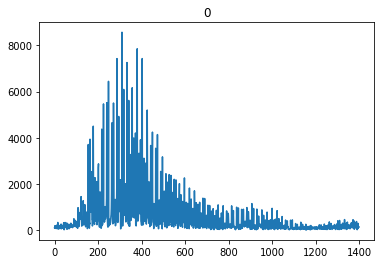

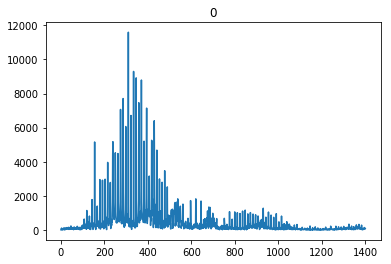

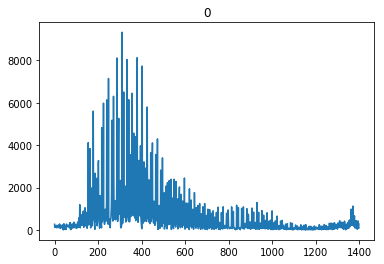

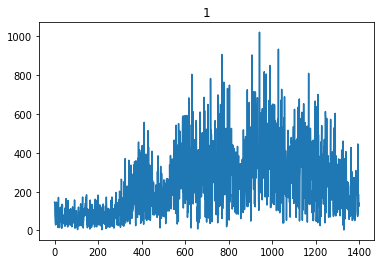

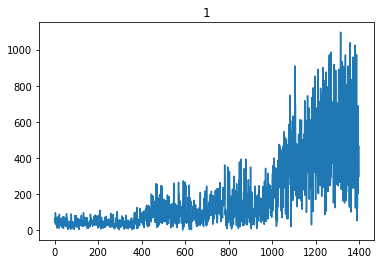

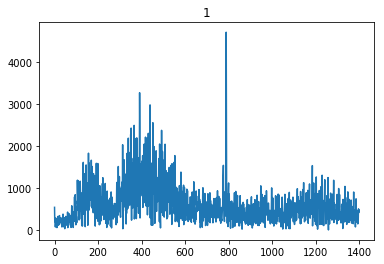

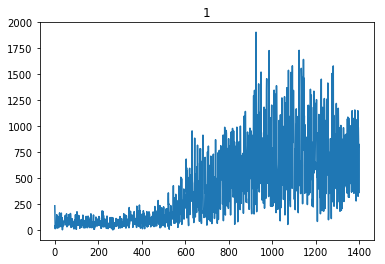

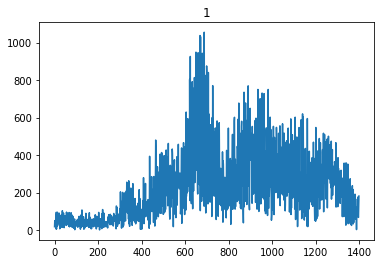

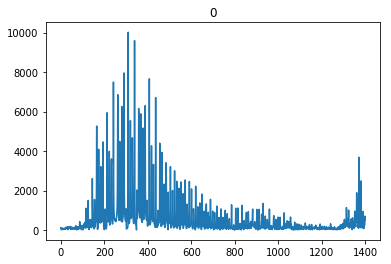

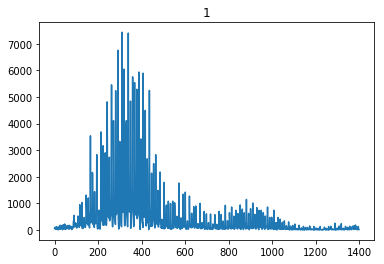

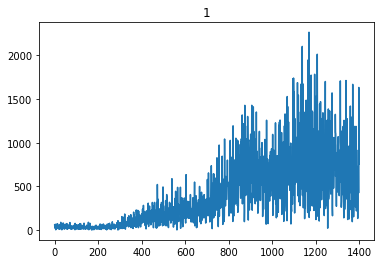

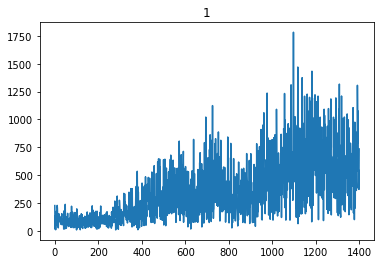

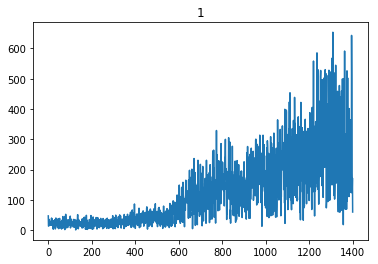

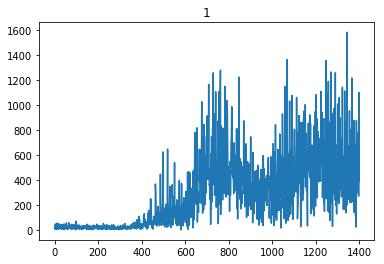

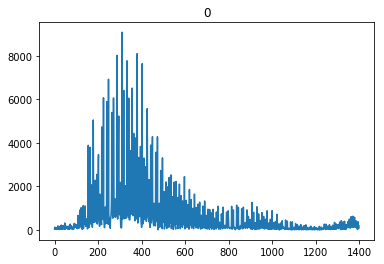

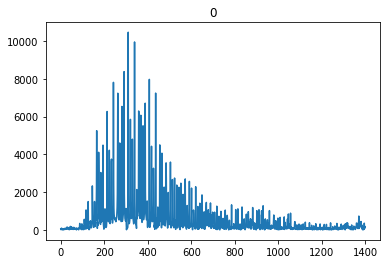

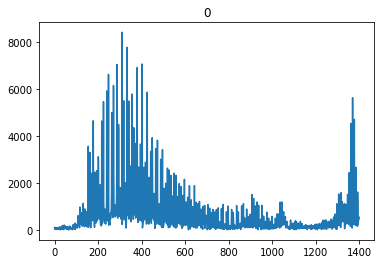

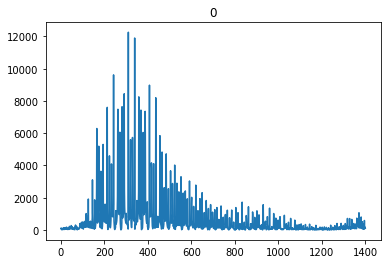

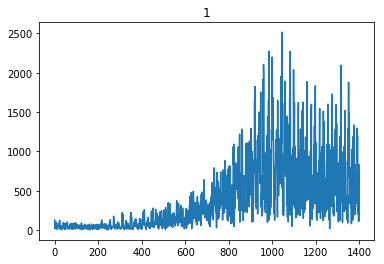

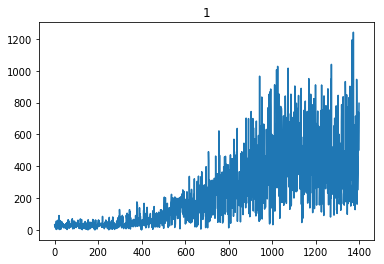

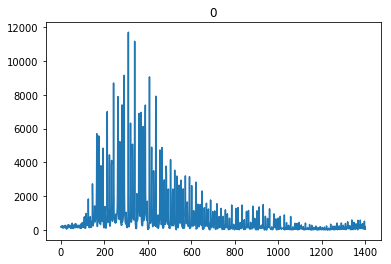

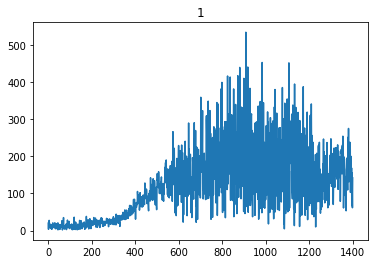

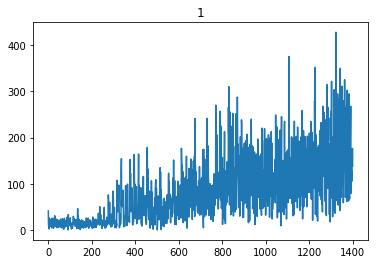

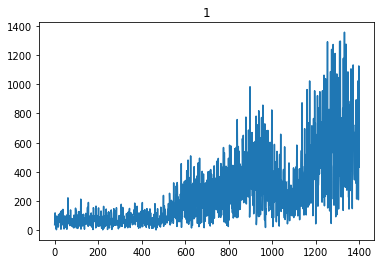

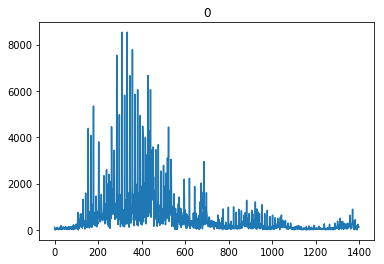

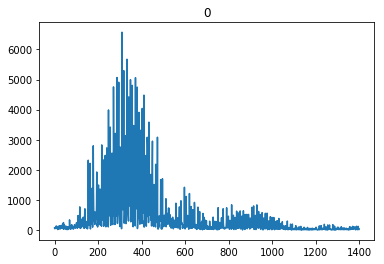

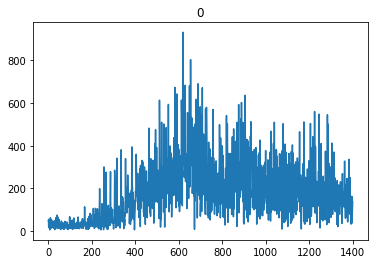

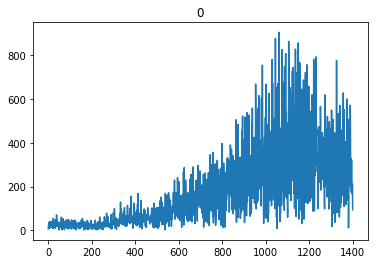

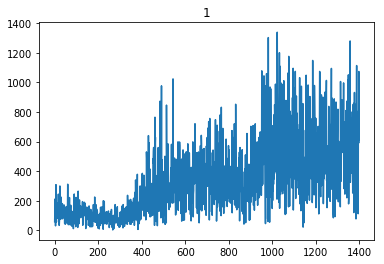

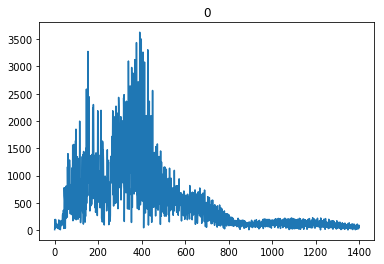

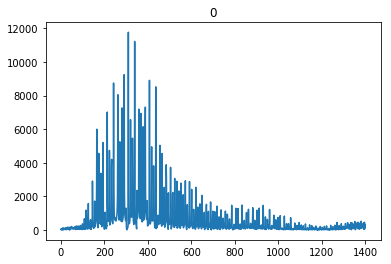

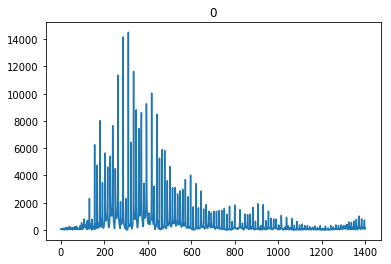

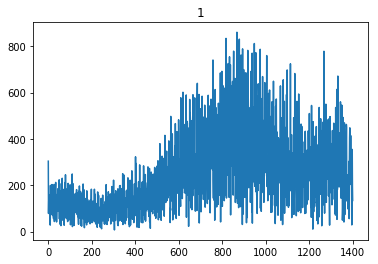

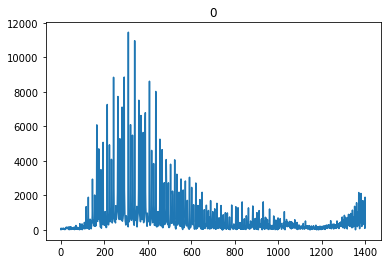

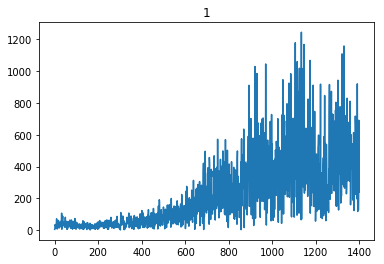

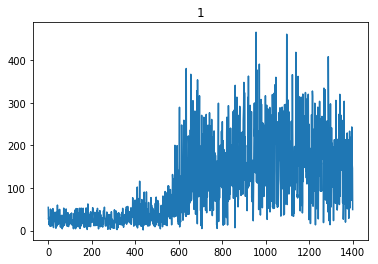

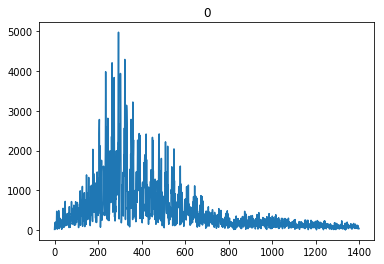

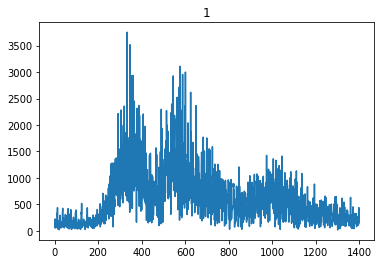

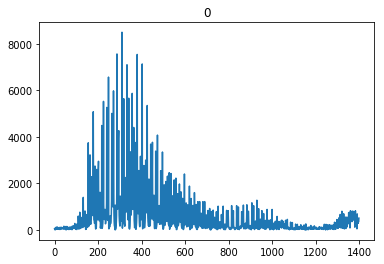

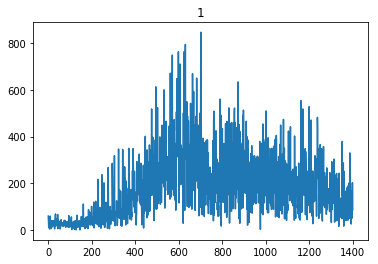

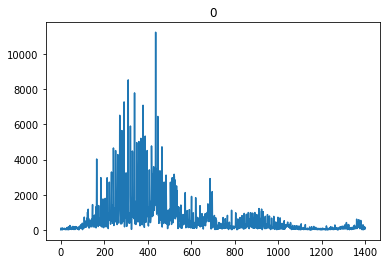

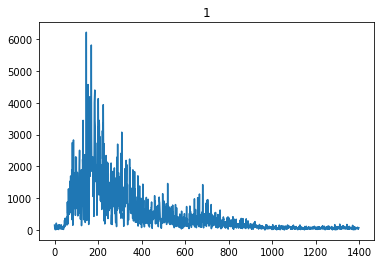

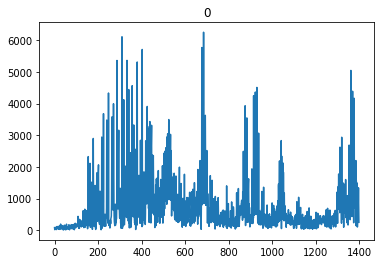

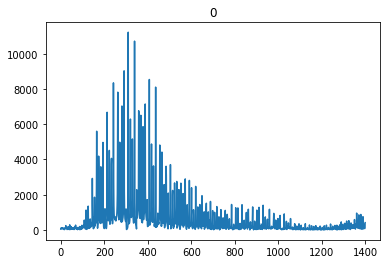

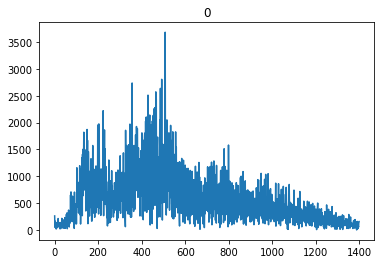

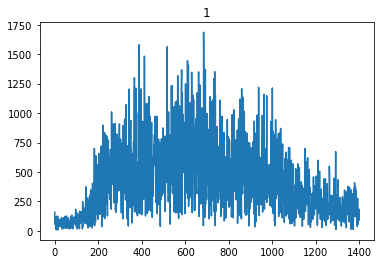

In [168]:
# PLOTTING ALL GRAPHS
#plt.subplots(nrows=10,ncols=5)
for i in range(X_train.shape[0]):
    #plt.subplots()
    plt.plot(X_train[i])
    plt.title(y_train[i])
    plt.show()

NameError: name 'data' is not defined

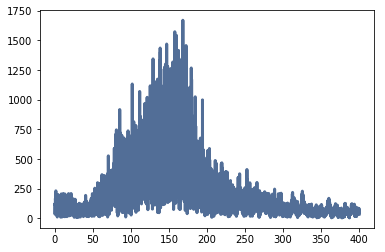

In [96]:
spectrum.plot(high=400)

y = spectrum.make_wave()

# class Wave:
def make_spectrum(self):
    n = len(self.ys)
    d = 1 / self.framerate
    hs = rfft(self.ys)
    fs = rfftfreq(n, d)
    return Spectrum(hs, fs, self.framerate)



spectrum = data[1].make_spectrum()
#print(type(spectrum))
#spectrum.plot(high=10000)
spectrum.low_pass(cutoff=400,factor=0.01)
#spectrum.plot(high=1000)
#spectrum.amps    

spectrum.plot(high=1000)

spectrum.hs[0]

spectrum.amps[0:2]

spectrum.fs

spectrum.angles



#To modify a Spectrum, you can access the hs directly. For example:
#spectrum.hs *= 2
#spectrum.hs[spectrum.fs > cutoff] = 0

In [98]:
y = X_normal.make_spectrum()